

前面两篇文章详细讲解了线性判别分析LDA，说到LDA，就不能不提到主成份分析，简称为PCA，是一种非监督学习算法，经常被用来进行数据降维、有损数据压缩、特征抽取、数据可视化（Jolliffe, 2002）。它也被称为Karhunen-Loève变换。




## 1. PCA原理


PCA的思想是将$n$维特征映射到$k$维空间上$k<n$，这$k$维特征是全新的正交特征，是重新构造出来的$k$维特征，而不是简单地从$n$维特征中去除其余$n-k$维特征。那么如何衡量投影向量的优劣呢？在数学上有三种方法衡量投影的优劣！PCA可以被定义为数据在低维线性空间上的正交投影，这个线性空间被称为主⼦空间（principal subspace），使得投影数据的⽅差被最⼤化（Hotelling, 1933），即最大方差理论。等价地，它也可以被定义为使得平均投影代价最⼩的线性投影，即最小误差理论。平均投影代价是指数据点和它们的投影之间的平均平⽅距离（Pearson, 1901）。还有另一个理论也可以解释PCA原理，即坐标轴相关度理论。这里简单探讨前两种，最后一种在讨论PCA意义时简单概述。


### 1.1 最大方差理论

在信号处理中认为信号具有较大的方差，噪声有较小的方差，信噪比就是信号与噪声的方差比，越大越好。因此我们认为，最好的$k$维特征是将$n$维样本点变换为$k$维后，每一维上的样本方差都尽可能的大。

首先，考虑在一维空间 (k=1) 上的投影。我们可以使用 $n$ 维向量$u$定义这个空间的方
向。为了方便(并且不失一般性)，我们假定选择一个单位向量，从而 $u^T u = 1$ (注意，我们只对$u$的方向感兴趣，而对 $u$本身的大小不感兴趣)。



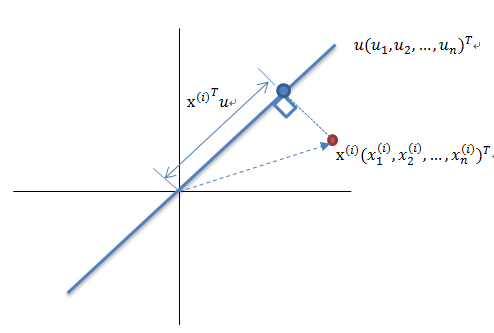

In [1]:
from IPython.display import display, Image

display(Image('pca1.jpg'))

如上图所示，红色点表示原样本点$x^{(i)}$，$u$是蓝色直线的斜率也是直线的方向向量，而且是单位向量，直线上的蓝色点表示原样本点$x^{(i)}$在$u$上的投影。容易知道投影点离原点的距离是$x^{(i)T}u$，由于这些原始样本点的每一维特征均值都为0，因此投影到u上的样本点的均值仍然是0。

假设原始数据集为$X_{mxn}$，我们的目标是找到最佳的投影空间$W_{nxk}=(w_1, w_2, …, w_k)$，其中$w_i$是单位向量且$w_i$与$w_j (i\neq j)$正交， 何为最佳的$W$？就是原始样本点投影到$W$上之后，使得投影后的样本点方差最大。

由于投影后均值为0，因此投影后的总方差为：

$$ \frac{1}{m}\sum_{i=1}^m (x^{(i)T}w)^2 = \frac{1}{m}\sum_{i=1}^m w^T x^{(i)} x^{(i)T}w =\sum_{i=1}^m w^T (\frac{1}{m} x^{(i)} x^{(i)T}) w_1  $$ 

$\frac{1}{m} x^{(i)} x^{(i)T}$是不是似曾相识，没错，它就是原始数据集$X$的协方差矩阵(因为$x^{(i)}$的均值为0，因为无偏估计的原因，一般协方差矩阵除以$m-1$，这里用m)。

记$\lambda =  \frac{1}{m}\sum_{i=1}^m (x^{(i)T}w)^2$, $\sum = \frac{1}{m} x^{(i)} x^{(i)T}$, 则有 

$$\lambda = w^T \sum w $$.

上式两边同时左乘$w$，注意到$w w^T =1$(单位向量)，则有

$$\lambda w = \sum w $$.

所以$w$是矩阵$\sum$的特征值所对应的特征向量。

欲使投影后的总方差最大，即$\lambda $最大，因此最佳的投影向量$w$是特征值$\lambda $最大时对应的特征向量，因此，当我们将$w$设置为与具有最大的特征值$\lambda$的特征向量相等时，方差会达到最大值。这个特征向量被称为第一主成分。

我们可以用一种增量的方式定义额外的主成分，方法为：在所有与那些已经考虑过的方向正交的所有可能的方向中，将新的方向选择为最大化投影方差的方向。如果我们考虑 $k$ 维投影空间的一般情形，那么最大化投影数据方差的最优线性投影由数据协方差矩阵 $\sum $ 的 $k$ 个特征向量 $w_1,..., w_k $ 定义，对应于 $k$ 个最大的特征值  $\lambda_1,..., \lambda_k $ 。可以通过归纳法很容易地证明出来。


因此，我们只需要对协方差矩阵进行特征值分解，得到的前$k$大特征值对应的特征向量就是最佳的$k$维新特征，而且这$k$维新特征是正交的。得到前$k$个$u$以后，原始数据集$X$通过变换可以得到新的样本。


### PCA算法流程

算法输入：数据集$X_{mxn}$
* 按列计算数据集$X$的均值$X_{mean}$，然后令$X_{new} = X - X_{mean}$；
* 求解矩阵$X_{new}$的协方差矩阵，并将其记为$Cov$；
* 计算协方差矩阵$COv$的特征值和相应的特征向量；
* 将特征值按照从大到小的排序，选择其中最大的$k$个，然后将其对应的$k$个特征向量分别作为列向量组成特征向量矩阵$W_{nxk}$;
* 计算$X_{new}W$，即将数据集$X_{new}$投影到选取的特征向量上，这样就得到了我们需要的已经降维的数据集$X_{new}W$。



注意，计算一个$nxn$矩阵的完整的特征向量分解的时间复杂度为 $O(n^3)$ 。如果我们将数据集投影到前 $k$ 个主成分中，那么我们只需寻找前 $k$ 个特征值和特征向量。这可以使用更高效的方法得到,例如幂方法(power method) (Golub and Van Loan, 1996)，它的时间复杂度为 $O(k n^2)$，或者我们也可以使用 EM 算法。

### 1.2 最小平方误差理论

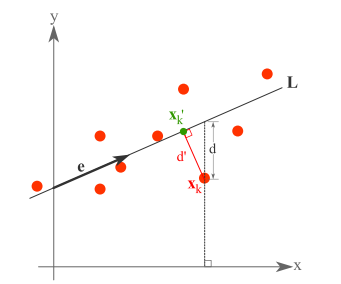

In [2]:
from IPython.display import display, Image

display(Image('pca2.png'))

如上图所示，假设有这样的二维样本点（红色点），按照前文我们讲解的最大方差理论，我们的目标是是求一条直线，使得样本点投影到直线或者平面上的点的方差最大。本质是求直线或者平面，那么度量直线求的好不好，不仅仅只有方差最大化的方法。再回想我们最开始学习的线性回归等，目的也是求一个线性函数使得直线能够最佳拟合样本点，那么我们能不能认为最佳的直线就是回归后的直线呢？回归时我们的最小二乘法度量的是样本点到直线的坐标轴距离。比如这个问题中，特征是x，类标签是y。回归时最小二乘法度量的是距离d。如果使用回归方法来度量最佳直线，那么就是直接在原始样本上做回归了，跟特征选择就没什么关系了。

因此，我们打算选用另外一种评价直线好坏的方法，使用点到直线的距离$d’$来度量。

现在有$m$个样本点$x^{(1)}, ..., x^{(m)}$，每个样本点为$n$维。将样本点$x^{(i)}$在直线上的投影记为$x^{(1)’}$，那么我们就是要最小化

$$ \sum_{i=1}^{m}(x^{(i)’} - x^{(i)})^2$$

这个公式称作最小平方误差（Least Squared Error）。

初中我们就已经知道确定一条直线，只需要知道直线经过某一个点和其方向即可。

首先，我们确定直线经过的点，假设要在空间中找一点$x_0$来代表这$m$个样本点，“代表”这个词不是量化的，因此要量化的话，我们就是要找一个$n$维的点$x_0$，使得

$$ J_0(x_0) = \sum_{i=1}^{m}(x_0 - x^{(i)})^2$$

最小。其中$ J_0(x_0)$是平方错误评价函数(squared-error criterion function)，假设$\bar x$为$m$个样本点的均值，即

$$\bar x = \frac{1}{m} \sum_{i=1}^{m}x^{(i)}$$

则

\begin{align*}
J_0(x_0) 
& = \sum_{i=1}^{m}(x_0 - x^{(i)})^2 \\
& = \sum_{i=1}^{m}((x_0 - \bar x) - (x^{(i)} - \bar x))^2 \\
& = \sum_{i=1}^{m}(x_0 - \bar x)^2 - 2 \sum_{i=1}^{m}(x_0 - \bar x)^T (x^{(i)} - \bar x) +  \sum_{i=1}^{m}(x^{(i)} - \bar x)^2 \\
& = \sum_{i=1}^{m}(x_0 - \bar x)^2 - 2 (x_0 - \bar x)^T \sum_{i=1}^{m} (x^{(i)} - \bar x) +  \sum_{i=1}^{m}(x^{(i)} - \bar x)^2  \\
& = \sum_{i=1}^{m}(x_0 - \bar x)^2  +  \sum_{i=1}^{m}(x^{(i)} - \bar x)^2  
\end{align*}

显然，上式的第二项与$x_0$无关，因此，$J_0(x_0) $在$\bar x$处有最小值。

接下来，我们确定直线的方向向量。我们已经知道直线经过点$\bar x$，假设直线的方向是单位向量$\vec e$。那么直线上任意一点$x^{(i)’}$有：

$$ x^{(i)’} = \bar x + a_i \vec e $$

其中，$a_i$是$x^{(i)’}$到点$\bar x$的距离。

我们重新定义最小平方误差：

\begin{align*}
J_1(a_1, a_2, ..., a_m, \vec e) 
& = \sum_{i=1}^{m}(x^{(i)’} - x^{(i)})^2 \\
& = \sum_{i=1}^{m}((\bar x + a_i \vec e) - x^{(i)})^2 \\
& = \sum_{i=1}^{m}(a_i \vec e - (x^{(i)} - \bar x ))^2 \\
& = \sum_{i=1}^{m} a^2_i \vec e^2 -2 \sum_{i=1}^{m} a_i \vec e^T (x^{(i)}-\bar x) + \sum_{i=1}^{m} (x^{(i)} - \bar x)^2 
\end{align*}


我们首先固定$\vec e$，将其看做是常量，然后令$J_1$ 关于 $a_i$ 的导数等于0，则有：

$$ a_i = \vec e^T(x^{(i)}-\bar x), $$

这个结果意思是说，如果知道了$\vec e$，那么将$(x_{(i)}-\bar x)$与$\vec e$做内积，就可以知道了$x^{(i)}$在$\vec e$上的投影离$\bar x$的长度距离，不过这个结果不用求都知道。

然后是固定$ a_i $，对$\vec e$求偏导数，我们先将 $a_i $代入$J_1$，得

\begin{align*}
J_1( \vec e) 
& = \sum_{i=1}^{m} a^2_i \vec e^2 -2 \sum_{i=1}^{m} a_i \vec e^T (x^{(i)}-\bar x) + \sum_{i=1}^{m} (x^{(i)} - \bar x)^2  \\
& = \sum_{i=1}^{m} a^2_i \vec e^2 -2 \sum_{i=1}^{m} a^2_i+ \sum_{i=1}^{m} (x^{(i)} - \bar x)^2  \\
& = - \sum_{i=1}^{m} (\vec e^T(x^{(i)}-\bar x))^2 + \sum_{i=1}^{m} (x^{(i)} - \bar x)^2 \\
& = - \sum_{i=1}^{m} \vec e^T (x^{(i)}-\bar x)(x^{(i)}-\bar x)^T \vec e + \sum_{i=1}^{m} (x^{(i)} - \bar x)^2 \\
& = -  \vec e^T S \vec e + \sum_{i=1}^{m} (x^{(i)} - \bar x)^2 
\end{align*}

其中$S = \sum_{i=1}^{m} (x^{(i)}-\bar x)(x^{(i)}-\bar x)^T  $，与协方差矩阵类似，只是缺少个分母$n-1$，我们称之为散列矩阵(scatter matrix)。

现在我们就可以用拉格朗日乘数法求解方向向量$\vec e$了。令

$$f(\vec e) = - \vec e^T S \vec e + \sum_{i=1}^{m} (x^{(i)} - \bar x)^2 + \lambda (\vec e^T \vec e - 1) $$

令上式关于$\vec e$的偏导数等于0，则可得

$$S \vec e = \lambda \vec e$$

两边除以$n-1$就变成了对协方差矩阵求特征值向量了。

从不同的思路出发，最后得到同一个结果，对协方差矩阵求特征向量，求得后特征向量上就成为了新的坐标，如下图：

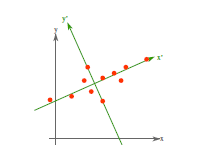

In [3]:
display(Image('pca3.png'))

这时候点都聚集在新的坐标轴周围，因为我们使用的最小平方误差的意义就在此。另外，PRML书上从线性子空间的角度进行了详细的阐述，有兴趣的读者可以看看。



## 2. PCA算法优缺点：

优点：

* 它是无监督学习，完全无参数限制的。在PCA的计算过程中完全不需要人为的设定参数或是根据任何经验模型对计算进行干预，最后的结果只与数据相关，与用户是独立的。

* 用PCA技术可以对数据进行降维，同时对新求出的“主元”向量的重要性进行排序，根据需要取前面最重要的部分，将后面的维数省去，可以达到降维从而简化模型或是对数据进行压缩的效果。同时最大程度的保持了原有数据的信息。

* 各主成分之间正交，可消除原始数据成分间的相互影响。

* 计算方法简单，易于在计算机上实现。


缺点：

* 如果用户对观测对象有一定的先验知识，掌握了数据的一些特征，却无法通过参数化等方法对处理过程进行干预，可能会得不到预期的效果，效率也不高。

* 贡献率小的主成分往往可能含有对样本差异的重要信息。

* 特征值矩阵的正交向量空间是否唯一有待讨论。

* 在非高斯分布的情况下，PCA方法得出的主元可能并不是最优的，此时在寻找主元时不能将方差作为衡量重要性的标准。



## 3. 代码实现

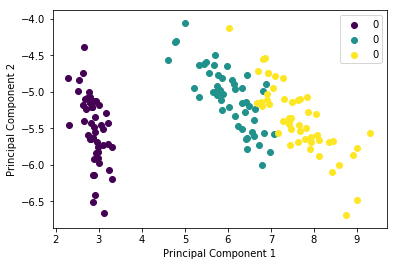

In [4]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np
%matplotlib inline



def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)

    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    return X[idx], y[idx]



# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 标准化数据集 X
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)

    # 做除法运算时请永远记住分母不能等于0的情形
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0) 
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]

    return X_std


# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    if shuffle:
        X, y = shuffle_data(X, y, seed)

    n_train_samples = int(X.shape[0] * (1-test_size))
    x_train, x_test = X[:n_train_samples], X[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]

    return x_train, x_test, y_train, y_test



# 计算矩阵X的协方差矩阵
def calculate_covariance_matrix(X, Y=np.empty((0,0))):
    if not Y.any():
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)


# 计算数据集X每列的方差
def calculate_variance(X):
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - X.mean(axis=0)).T.dot(X - X.mean(axis=0)))
    return variance


# 计算数据集X每列的标准差
def calculate_std_dev(X):
    std_dev = np.sqrt(calculate_variance(X))
    return std_dev


# 计算相关系数矩阵
def calculate_correlation_matrix(X, Y=np.empty([0])):
    # 先计算协方差矩阵
    covariance_matrix = calculate_covariance_matrix(X, Y)
    # 计算X, Y的标准差
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance_matrix, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)



class PCA():
    """
    主成份分析算法PCA，非监督学习算法.
    """
    def __init__(self):
        self.eigen_values = None
        self.eigen_vectors = None
        self.k = 2

    def transform(self, X):
        """ 
        将原始数据集X通过PCA进行降维
        """
        covariance = calculate_covariance_matrix(X)

        # 求解特征值和特征向量
        self.eigen_values, self.eigen_vectors = np.linalg.eig(covariance)

        # 将特征值从大到小进行排序，注意特征向量是按列排的，即self.eigen_vectors第k列是self.eigen_values中第k个特征值对应的特征向量
        idx = self.eigen_values.argsort()[::-1]
        eigenvalues = self.eigen_values[idx][:self.k]
        eigenvectors = self.eigen_vectors[:, idx][:, :self.k]

        # 将原始数据集X映射到低维空间
        X_transformed = X.dot(eigenvectors)

        return X_transformed


def main():
    # Load the dataset
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # 将数据集X映射到低维空间
    X_trans = PCA().transform(X)

    x1 = X_trans[:, 0]
    x2 = X_trans[:, 1]

    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    class_distr = []
    # Plot the different class distributions
    for i, l in enumerate(np.unique(y)):
        _x1 = x1[y == l]
        _x2 = x2[y == l]
        _y = y[y == l]
        class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

    # Add a legend
    plt.legend(class_distr, y, loc=1)

    # Axis labels
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


if __name__ == "__main__":
    main()


参考文献：

《模式识别和机器学习》

http://www.cnblogs.com/jerrylead/archive/2011/04/18/2020216.html